# Predicting a House's Price 

The objective of this project is to develop a model capable of accurately predicting house prices based on their characteristics. This will involve training the model using a dataset comprising 2930 residential properties in Ames, Iowa, spanning from 2006 to 2010.We will construct and refine models through a blend of feature engineering, feature selection techniques, and linear regression. The performance of our model will be assessed using the Root-Mean-Squared-Error (RMSE) metric, comparing predicted values to actual sales prices. While originally compiled for educational purposes to aid in creating predictive models, the outcomes could inform decisions regarding the features that contribute most to a house's value. This could prove valuable for individuals involved in house design or renovation projects.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold



In [7]:
# Read in the data
houses = pd.read_csv('AmesHousing.tsv', delimiter = '\t')

# Preview the data
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# Examine columns
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# Cleaning the data


In [9]:

def missing_features(houses):
    missing_values = houses.isnull().sum()*100/len(houses)

    return print ('The percentage of missing values for each column is listed below:'
                  '\n \n'
                  f'{missing_values[missing_values>0].sort_values(ascending=False).round(2)}')
    
missing_features(houses)



The percentage of missing values for each column is listed below:
 
Pool QC           99.56
Misc Feature      96.38
Alley             93.24
Fence             80.48
Mas Vnr Type      60.58
Fireplace Qu      48.53
Lot Frontage      16.72
Garage Cond        5.43
Garage Qual        5.43
Garage Finish      5.43
Garage Yr Blt      5.43
Garage Type        5.36
Bsmt Exposure      2.83
BsmtFin Type 2     2.76
Bsmt Cond          2.73
Bsmt Qual          2.73
BsmtFin Type 1     2.73
Mas Vnr Area       0.78
Bsmt Half Bath     0.07
Bsmt Full Bath     0.07
BsmtFin SF 1       0.03
Garage Cars        0.03
Garage Area        0.03
Total Bsmt SF      0.03
Bsmt Unf SF        0.03
BsmtFin SF 2       0.03
Electrical         0.03
dtype: float64


It appears evident to remove features missing approximately 50% or more of their values, while retaining those with around 95% or more. Only Lot Frontage remains with approximately 16.7% missing values, defined as the linear feet of street connected to the property, according to the dataset source.

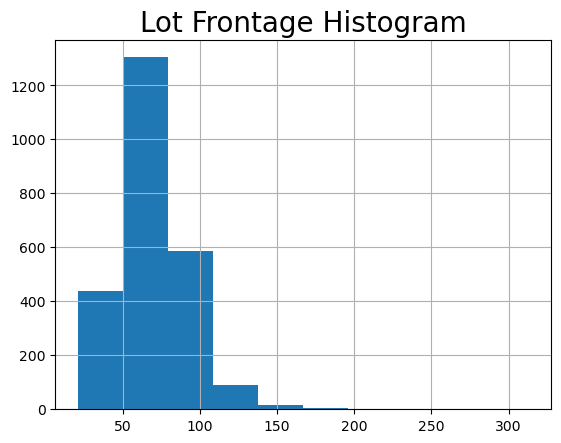

In [10]:
# Examine Lot Frontage distribution
houses['Lot Frontage'].hist()
plt.title('Lot Frontage Histogram', size=20)
plt.show()

In [11]:
# Remove column features that are missing more than 10% of their values

def transform_features(houses):
    missing = houses.isnull().sum()
    missing_houses = missing[missing>(len(houses)/10)]
    houses_modified = houses.drop(missing_houses.index,axis=1)
    return houses_modified

transformed_houses = transform_features(houses)

transformed_houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Q

In [12]:
# Identify whcih features still have missing values
def missing_values (df):
    missing_values = transformed_houses.isnull().sum()
    incomplete_columns = missing_values[missing_values>0]
    incomplete_columns = incomplete_columns.index
    return print(transformed_houses[incomplete_columns].info())

print(f'\033[1mHere are the features that still contain missing values:\033[0m \n')
missing_values(transformed_houses)


Here are the features that still contain missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mas Vnr Area    2907 non-null   float64
 1   Bsmt Qual       2850 non-null   object 
 2   Bsmt Cond       2850 non-null   object 
 3   Bsmt Exposure   2847 non-null   object 
 4   BsmtFin Type 1  2850 non-null   object 
 5   BsmtFin SF 1    2929 non-null   float64
 6   BsmtFin Type 2  2849 non-null   object 
 7   BsmtFin SF 2    2929 non-null   float64
 8   Bsmt Unf SF     2929 non-null   float64
 9   Total Bsmt SF   2929 non-null   float64
 10  Electrical      2929 non-null   object 
 11  Bsmt Full Bath  2928 non-null   float64
 12  Bsmt Half Bath  2928 non-null   float64
 13  Garage Type     2773 non-null   object 
 14  Garage Yr Blt   2771 non-null   float64
 15  Garage Finish   2771 non-null   object 
 16  Garage Cars     292

## Replacing missing values



In [13]:
# Replace missing features with the mode for that feature column
def fill_na_mode(transformed_houses):
    return transformed_houses.fillna(transformed_houses.mode().to_dict(orient='records')[0])

transformed_houses = fill_na_mode(transformed_houses)

print(f'\033[1mHere are the features that still contain missing values:\033[0m \n')

# Verify that all missing values have been filled.
missing_values(transformed_houses)

Here are the features that still contain missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Empty DataFrame
None


In [14]:
print(f'\033[1mHere are the features that already have numerical values:\033[0m \n')
print(transformed_houses.select_dtypes(include=['integer','float']).info())
print('\n')

print(f'\033[1mHere are the features that do not currently have numerical values:\033[0m \n')

print(transformed_houses.select_dtypes('object').info())
      

Here are the features that already have numerical values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Area         2930 non-null   int64  
 4   Overall Qual     2930 non-null   int64  
 5   Overall Cond     2930 non-null   int64  
 6   Year Built       2930 non-null   int64  
 7   Year Remod/Add   2930 non-null   int64  
 8   Mas Vnr Area     2930 non-null   float64
 9   BsmtFin SF 1     2930 non-null   float64
 10  BsmtFin SF 2     2930 non-null   float64
 11  Bsmt Unf SF      2930 non-null   float64
 12  Total Bsmt SF    2930 non-null   float64
 13  1st Flr SF       2930 non-null   int64  
 14  2nd Flr SF       2930 non-null   int64  
 15  Low Qual Fin SF  2930 non-null   int64  
 16  

# Feature Engineering Decisions

Below are techniques to enhance feature engineering for improved model accuracy:

Validate the relevance of numerical data.
Convert ordinal data into numerical equivalents, where order matters but precise differences are unknown (e.g., customer service satisfaction levels).
Transform categorical (nominal) data into numeric representations using dummy variables


In [15]:
transformed_houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


Some numerical features that stand out as potentially problematic are the year built and the year remodeled. A houses's age and how recently it has been remodeled are likely important information in determining a house's value, but storing that data in calendar years might not be the most effective way to model that information. A home built in 1960 is thirty years older than a home built in 1990, but the model will only see it as being ~1% older because that's about much larger 1,990 is than 1,960. 

One way to fix this is to change the year built/remodeled columns to list how many years it has been since the home has been built/remodeled. If we are modeling from the year 2000, a home built in 1960 would have a value in 40 and a home built in 1980 would have a value of 20. With the data coded in this was, the model will view one value being double that of the other.

We will create a new column that reflects how many years have passed from when the home was built until the home was sold. We will also create a column that reflects how many years have passed since the home has been remodeled.

In [11]:
# Create new columns that show years since home has been built and remodeled
def year_adjust(df):
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    return df

transformed_houses = year_adjust(transformed_houses)



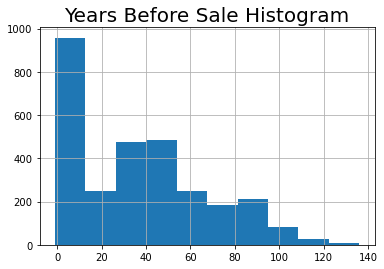

In [12]:
transformed_houses['Years Before Sale'].hist()
plt.title('Years Before Sale Histogram', size=20)
plt.show()

Almost 1000 houses in our dataset were built less than ten years before they were sold. Some houses are over 100 years old.

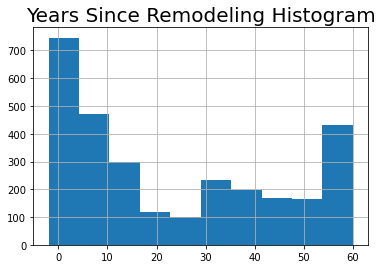

In [13]:
transformed_houses['Years Since Remod'].hist()
plt.title('Years Since Remodeling Histogram', size=20)
plt.show()

Over 700 homes in our dataset were remodeled less than 5 years before they were sold.

In [14]:
# Check to see if any year value columns are negative
neg_years = len(transformed_houses[(transformed_houses['Years Since Remod'] < 0)|
                                   (transformed_houses['Years Before Sale'] < 0)])
print(f'The number of houses that have negative values for years since remodeleing or years before sale is: {neg_years}')

The number of houses that have negative values for years since remodeleing or years before sale is: 3


It appears that some of the year values are negative, which should not be possible. We will remove rows with negative year values.

In [15]:
# Remove negative year value columns
filtering = transformed_houses[(transformed_houses['Years Since Remod'] < 0)
                               |(transformed_houses['Years Before Sale'] < 0)]
transformed_houses = transformed_houses.drop(filtering.index, axis=0).reset_index(drop=True)



In [16]:
print(f'The number of house entries is now {transformed_houses.shape[0]}.')
print(f'The number of house features is now {transformed_houses.shape[1]}:')
print('\n')
print(list(transformed_houses.columns))

The number of house entries is now 2927.
The number of house features is now 78:


['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',

## Feature Removal

In creating a model to predict house prices, we want to make sure that the features we include will provide useful information in predicting the house prices. There are some features that do not contribute information that would be useful in predicting the house prices. The features 'Order' and 'PID' are essentially house identification numbers and do not describe features of the houses themselves, so these features can be removed.

Another group of features that should be scrutinized are any features that describe details about the sale rather than the house. While these features might help our model make more accurate predictions, the purpose of this project was to build a model that predicts the price of a house based on its features. Including details about the sale would make the prediction be based on something other than the features of the houses themselves.

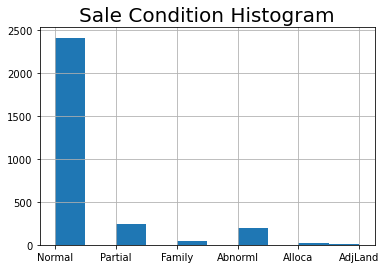

In [17]:
transformed_houses['Sale Condition'].hist()
plt.title('Sale Condition Histogram',size=20)
plt.show()

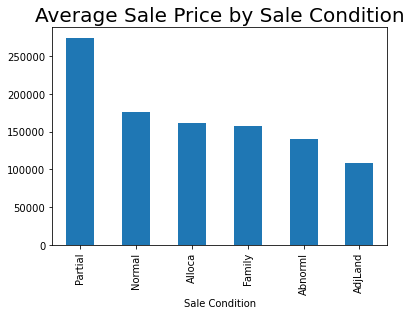

In [18]:
transformed_houses.groupby('Sale Condition')['SalePrice'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Average Sale Price by Sale Condition', size=20)
plt.show()
#plt.bar(transformed_houses['Sale Condition'],transformed_houses['SalePrice'])

Looking at the above two graphs, it appears that most of the sales types are listed as normal. A small portion are partial (meaning that the home was not completed when last assessed and is likely new) or abnormal, which includes trades, foreclosures, and short sales. There does appear to be some correltaion between sale condition and sale price. It makes sense that newer homes would, on average, sell for higher prices.

The concern with using data from foreclosures or sales between family members is that its possible that the price would be lower than it would if a home with identifical features were sold through a normal sale. 

We will remove the houses sold under family or abnormal sale conditions. We will also remove sale condition and sale month features. The model will still be able to know that a home is new by using the 'Years Before Sale' feature. We will also remove the ID features described previously.

In [19]:
# Remove Family and Abnormal sale types
def remove_biased_sales (df):
    biased_conditions = ['Family','Abnormal']
    filtering = df[df['Sale Condition'].isin(biased_conditions)]
    #filtering = df[(df['Years Since Remod']=='Family'|df['Years Since Remod']=='Abnormal')]
    df = df.drop(filtering.index, axis=0).reset_index(drop=True)
    return df

transformed_houses = remove_biased_sales(transformed_houses)

# Remove columns that will do not add value to our price prediction model
def remove_flawed_features (df):
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], 
                 axis=1).reset_index(drop=True)
    return df

transformed_houses = remove_flawed_features(transformed_houses)


In [20]:
transformed_houses.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,2010,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,2010,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,2010,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,2010,189900,13,12


In [21]:
print(f'The number of house entries is now {transformed_houses.shape[0]}.')
print(f'The number of house features is now {transformed_houses.shape[1]}:')

print('\n')

print(f"\033[1mHere are the remaining features that are described by text:\033[0m")

original_num_features = transformed_houses.select_dtypes('number')


text_features = transformed_houses.select_dtypes(exclude='number')
print(list(text_features.columns))

The number of house entries is now 2881.
The number of house features is now 71:


Here are the remaining features that are described by text:
['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive']


## Converting Ordinal Features to Numbers 

At this point we could remove all text features and use the numeric features to create a price prediction model. There exists some low hanging fruit in our text data. This low hanging fruit is ordinal data. Ordinal data is text data that is rated along an ordinal scale. An example of this is the feature 'Kitchen Qual.' The possible values are: 

- Ex:	Excellent
- Gd:	Good
- TA:	Typical/Average
- Fa:	Fair
- Po:	Poor


These text values can be easily converted to numerical feautres:

- 5:	Excellent
- 4:	Good
- 3:	Typical/Average
- 2:	Fair
- 1:	Poor

Converting ordinal features to numeric features will allow them to be used in our price prediction model. In the code below, we will use the [feature descriptions](https://s3.amazonaws.com/dq-content/307/data_description.txt) to identify ordinal features and convert them to numeric values.

In [22]:
# Examine ordinal features
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
                    'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'BsmtFin Type 1', 'Kitchen Qual',
                    'Functional', 'Paved Drive', 'Garage Qual', 'Garage Cond']

for feature in ordinal_features:
    print(f'{feature}: {transformed_houses[feature].unique()}')

Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope: ['Gtl' 'Mod' 'Sev']
Exter Qual: ['TA' 'Gd' 'Ex' 'Fa']
Exter Cond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Bsmt Qual: ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Bsmt Cond: ['Gd' 'TA' 'Po' 'Fa' 'Ex']
Bsmt Exposure: ['Gd' 'No' 'Mn' 'Av']
Heating QC: ['Fa' 'TA' 'Ex' 'Gd' 'Po']
BsmtFin Type 1: ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ']
Kitchen Qual: ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional: ['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
Paved Drive: ['P' 'Y' 'N']
Garage Qual: ['TA' 'Fa' 'Gd' 'Ex' 'Po']
Garage Cond: ['TA' 'Fa' 'Gd' 'Ex' 'Po']


In [23]:
# Create map to convert ordinal features to numbers
feature_mapping = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
                   'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1},
                   'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
                   'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1},
                   'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},                   
                   'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1},
                   'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},                   
                   'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 
                                  'Sev': 2, 'Sal': 1},
                   'Paved Drive': {'Y': 3, 'P': 2, 'N': 1},
                   'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
                   'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}}

for f in feature_mapping:
    transformed_houses[f] = transformed_houses[f].map(feature_mapping[f])



In [24]:
# Review new ordinal feature values
for feature in ordinal_features:
    print(f'{feature}: {sorted(transformed_houses[feature].unique())}')

Lot Shape: [1, 2, 3, 4]
Utilities: [1, 2, 3]
Land Slope: [1, 2, 3]
Exter Qual: [2, 3, 4, 5]
Exter Cond: [1, 2, 3, 4, 5]
Bsmt Qual: [1, 2, 3, 4, 5]
Bsmt Cond: [1, 2, 3, 4, 5]
Bsmt Exposure: [1, 2, 3, 4]
Heating QC: [1, 2, 3, 4, 5]
BsmtFin Type 1: [1, 2, 3, 4, 5, 6]
Kitchen Qual: [1, 2, 3, 4, 5]
Functional: [1, 2, 3, 4, 5, 6, 7, 8]
Paved Drive: [1, 2, 3]
Garage Qual: [1, 2, 3, 4, 5]
Garage Cond: [1, 2, 3, 4, 5]


In [25]:
print(f"\033[1mHere are the remaining features that are described by text:\033[0m\n")

# Examine remaining text features
updated_text_features = transformed_houses.select_dtypes(exclude='number')
print(list(updated_text_features.columns))

Here are the remaining features that are described by text:

['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish']


## Converting Categorical Features to Numbers 

The list above shows the remaining text features. We cannot use the mapping method we used for ordinal values because the categorical feature entries are not ranked. An example of this is the Roof Style feature. Some people may prefer a certain roof style, but the different types are more subjective than say having a paved vs gravel driveway. 

Roof Style: Type of roof

- Flat
- Gable
- Gambrel
- Hip
- Mansard
- Shed


The way we get around this is with dummy variables. If we used dummy variables for roof style, instead of indicating what type of roof each house had, we would have separate columns for each style (flat, gable, etc) and indicate whether the house has that type by inputting a 1 or 0 for the columns that represents that style. So a house that has a hip roof style would have a 1 for 'roof-hip' and a 0 for the other 'dummy' roof columns. This will allow us to include these categorical features into our model.

Some categorical feautures will likely provide more useful information than others. Some questions we can explore about each feature are:
- How many unique values are there for each categorical feature?
- Do the vast majority of houses have the same value for certain categorical features?
- Are there some categorical features that seem unlikely to impact the price of houses?

In [26]:
# Examing the number of unique values for each text feature
for f in updated_text_features:
    print(f'\033[1m{f} has {transformed_houses[f].nunique()} unique values: \033[0m\n{transformed_houses[f].value_counts(normalize=True).round(2)}\n')

MS Zoning has 7 unique values: 
RL         0.78
RM         0.16
FV         0.05
RH         0.01
C (all)    0.01
I (all)    0.00
A (agr)    0.00
Name: MS Zoning, dtype: float64

Street has 2 unique values: 
Pave    1.0
Grvl    0.0
Name: Street, dtype: float64

Land Contour has 4 unique values: 
Lvl    0.90
HLS    0.04
Bnk    0.04
Low    0.02
Name: Land Contour, dtype: float64

Lot Config has 5 unique values: 
Inside     0.73
Corner     0.17
CulDSac    0.06
FR2        0.03
FR3        0.00
Name: Lot Config, dtype: float64

Neighborhood has 28 unique values: 
NAmes      0.15
CollgCr    0.09
OldTown    0.08
Edwards    0.07
Somerst    0.06
NridgHt    0.06
Gilbert    0.06
Sawyer     0.05
NWAmes     0.04
SawyerW    0.04
Mitchel    0.04
BrkSide    0.04
Crawfor    0.03
IDOTRR     0.03
Timber     0.02
NoRidge    0.02
StoneBr    0.02
SWISU      0.02
ClearCr    0.02
MeadowV    0.01
BrDale     0.01
Blmngtn    0.01
NPkVill    0.01
Veenker    0.01
Blueste    0.00
Greens     0.00
GrnHill    0.00
Landmr

We notice that Central Air has only 2 unique values so we can replace Y or N with 1 or 0. 

We will then examine features that have more than 15 unique values, but that do not have one value that applies to more than 90% of houses. This will allow us to make sure we understand what features we are removing from our model.

In [27]:
# Convert ac_map feature entires to 1/0 instead of Y/N
ac_map = {'Y': 1, 'N': 0}
transformed_houses['Central Air'] = transformed_houses['Central Air'].map(ac_map)
transformed_houses['Central Air'].value_counts()

1    2688
0     193
Name: Central Air, dtype: int64

In [28]:
debatable_features = []
updated_text_features = transformed_houses.select_dtypes(exclude='number')

# Identify features that have more than 15 unique entries without one of them making up at least 90% of entries
for f in updated_text_features:
    most_freq = transformed_houses[f].value_counts(normalize=True)[0]
    if transformed_houses[f].nunique() > 15 and most_freq < .90:
        debatable_features.append(f)

# Examine unique values for above features
for d_f in debatable_features:
    print(f'\033[1m{d_f} has {transformed_houses[d_f].nunique()} unique values: \033[0m\n{transformed_houses[d_f].value_counts(normalize=True).round(2)}\n')

Neighborhood has 28 unique values: 
NAmes      0.15
CollgCr    0.09
OldTown    0.08
Edwards    0.07
Somerst    0.06
NridgHt    0.06
Gilbert    0.06
Sawyer     0.05
NWAmes     0.04
SawyerW    0.04
Mitchel    0.04
BrkSide    0.04
Crawfor    0.03
IDOTRR     0.03
Timber     0.02
NoRidge    0.02
StoneBr    0.02
SWISU      0.02
ClearCr    0.02
MeadowV    0.01
BrDale     0.01
Blmngtn    0.01
NPkVill    0.01
Veenker    0.01
Blueste    0.00
Greens     0.00
GrnHill    0.00
Landmrk    0.00
Name: Neighborhood, dtype: float64

Exterior 1st has 16 unique values: 
VinylSd    0.35
MetalSd    0.15
HdBoard    0.15
Wd Sdng    0.14
Plywood    0.07
CemntBd    0.04
BrkFace    0.03
WdShing    0.02
AsbShng    0.01
Stucco     0.01
BrkComm    0.00
AsphShn    0.00
CBlock     0.00
Stone      0.00
PreCast    0.00
ImStucc    0.00
Name: Exterior 1st, dtype: float64

Exterior 2nd has 17 unique values: 
VinylSd    0.35
MetalSd    0.15
HdBoard    0.14
Wd Sdng    0.14
Plywood    0.09
CmentBd    0.04
Wd Shng    0.03
BrkF

We may want to eliminate features that have many (~15 or more) values because they may add complexity to our model without improving its accuracy. One of the features that has more many unique values is neighborhood. It seems unwise to remove location data from a model that will be used to predict the price of a house because the location of a house is likely to be important. We will keep the neighborhood feature and the first exterior feature.

In [29]:
# Create list of text features we want to keep in model
usable_features = []
for f in updated_text_features:
    most_freq = transformed_houses[f].value_counts(normalize=True)[0]
    if f != 'Exterior 2nd' and most_freq < .90:
        usable_features.append(f)
print(usable_features)

['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Mas Vnr Type', 'Foundation', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish']


In [30]:
# Create list of features we want to remove
removable_features = list(set(updated_text_features) - set(usable_features))

print(f'\033[1mCategorical features to be removed:\033[0m\n{removable_features}\n')
print(f'\033[1mCategorical features to be converted to dummy variables:\033[0m\n{usable_features}\n')



Categorical features to be removed:
['Electrical', 'Condition 2', 'Street', 'Heating', 'Exterior 2nd', 'Roof Matl']

Categorical features to be converted to dummy variables:
['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Mas Vnr Type', 'Foundation', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish']



We will now remove the categorical features that we don't want to include in our model and convert the desired categorical features to dummy variables so that they can be represented by numerical values and be included in our price prediction model.

In [31]:
# Remove features we do not want to use to build our prediction model
def remove_features (df, features):
    df = df.drop(features, axis=1).reset_index(drop=True)
    return df

transformed_houses = remove_features(transformed_houses, removable_features)


In [32]:
# Review text features
print(transformed_houses.select_dtypes(exclude='number').columns)

Index(['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Mas Vnr Type', 'Foundation', 'BsmtFin Type 2', 'Garage Type',
       'Garage Finish'],
      dtype='object')


In [33]:
# Replace text features with dummy variables
def get_dummies(df, features):
    
    for f in features:
        df[f] = df[f].astype('category')
    df = pd.concat([df,pd.get_dummies(df.select_dtypes('category'))], axis=1).drop(features, axis=1)
    return df

transformed_houses = get_dummies(transformed_houses, usable_features)


In [34]:
# Examine dataframe we will use to build our model
transformed_houses.head()

,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf
0,20,31770,3,3,3,6,5,112.0,3,3,3,4,4,4,639.0,0.0,441.0,1080.0,2,1,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,1960.0,2.0,528.0,3,3,2,210,62,0,0,0,0,0,2010,215000,50,50,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,20,11622,4,3,3,5,6,0.0,3,3,3,3,1,3,468.0,144.0,270.0,882.0,3,1,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,1961.0,1.0,730.0,3,3,3,140,0,0,0,120,0,0,2010,105000,49,49,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,20,14267,3,3,3,6,6,108.0,3,3,3,3,1,5,923.0,0.0,406.0,1329.0,3,1,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,1958.0,1.0,312.0,3,3,3,393,36,0,0,0,0,12500,2010,172000,52,52,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,20,11160,4,3,3,7,5,0.0,4,3,3,3,1,5,1065.0,0.0,1045.0,2

## Let the Modeling Begin

Now that we have selected all the features we want to include in our price prediction model, we will perform Linear Regression using a module in Scikit-learn, which is a Python machine learning library. When creating models, it is important to be able to test them. A simple way to do this is to train the model using only part of the dataset and then to see how well the model does on the remaining part of the dataset. 

We will start by splitting the dataset into two sets. We will train the model using the features of the houses in the first set and then test how well the model is able to predict the prices of the data on the second set. The Root-Mean-Square-Error (RMSE) will let us know how far off our predictions were from the actual values. 

In [35]:
transformed_houses.shape

(2881, 165)

In [36]:
def train_and_test(df):
    lr = LinearRegression()
    
    features = df.columns.drop('SalePrice')

    X = df[features]
    y = df['SalePrice']
    
    # Split the dataset in to a train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Build a Linear Regression model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions on test set
    predictions = lr.predict(X_test)
    
    # Calculate RMSE on test set predictions
    rmse = round(np.sqrt(mean_squared_error(y_test, predictions)),2)
    return rmse

train_and_test(transformed_houses)    

29959.96

Another way to assess how well the model performs is to use [K-Fold cross-validation](https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0). In this method, the model will be split up into multiple different sections (folds) and then each fold will take turns being the test set. This will ensure that we don't randomly choose a train/test split that provides us with an unrealistic RMSE value.

In [37]:
def k_fold_train_test(df, k):
    
    lr = LinearRegression()

    features = df.columns.drop('SalePrice')

    X = df[features]
    y = df['SalePrice']
    
    # Split data into different folds
    kf = KFold(n_splits=k, shuffle=True)
    rmse_values = []
    
    # Cycle through different folds as test set
    for train_index, test_index in kf.split(X):
        # Split the dataset in to a train and test set
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        
        # Build a Linear Regression model with training set
        lr.fit(X_train, y_train)
        
        # Make predictions on test set
        predictions = lr.predict(X_test)
        
        # Calculate RMSE on test set predictions
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        rmse_values.append(round(rmse, 2))
    print(f'RMSE values: {rmse_values}')
    
    # Calculate average RMSE from different iterations
    rmse = round(np.mean(rmse_values),2)
    print(f'Average RMSE: {rmse}')
    return rmse

k_fold_train_test(transformed_houses,5)

RMSE values: [22549.65, 26938.18, 23634.59, 35981.37, 25398.91]
Average RMSE: 26900.54


26900.54

In [38]:
# This function will test the model on the same dataset that it was trained on.
def k_fold_bias_test(df, k):
    
    lr = LinearRegression()

    features = df.columns.drop('SalePrice')

    X = df[features]
    y = df['SalePrice']
    
    kf = KFold(n_splits=k, shuffle=True)
    rmse_values = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_train)
        mse = mean_squared_error(y_train, predictions)
        rmse = np.sqrt(mse)
        rmse_values.append(round(rmse, 2))
    print(f'RMSE values: {rmse_values}')
    rmse = round(np.mean(rmse_values),2)
    print(f'RMSE: {rmse}')
    return rmse

k_fold_bias_test(transformed_houses,5)

RMSE values: [24308.6, 22284.89, 24237.56, 23150.73, 24506.87]
RMSE: 23697.73


23697.73

## Feature Selection

So far we have used all numeric features in our model. In this instance our dataset is small enough that computational capacity is not an issue. It is possible, however, that we can get a better model (one that produces a lower RMSE), if we only use features that are more closely linked with house prices.

To determine which features are more closely linked with house prices, we will start by using univariate feature selection. This method compares each feature one by one to the target variable (sale price in this case), to see whether there is any statistically significant relationship between them. Each feature will get a score based on its relationship to the target variable and we can select the features with top scores. We will use the SelectKBest module with the chi-square test. 

More information on features selection methods can be found [here](https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028).



In [39]:
print(f'\033[1mOur model currently has {transformed_houses.shape[1]} features. \033[0m')

Our model currently has 165 features. 


In [40]:
# move target column (SalePrice) to end 
transformed_houses.columns.get_loc('SalePrice')
temp_cols=transformed_houses.columns.tolist()
index=transformed_houses.columns.get_loc('SalePrice')
col_len=len(temp_cols)
temp_cols[1:] + temp_cols[0:1]
new_cols= temp_cols[0:index] + temp_cols[index+1:] + temp_cols[index:index+1]
transformed_houses=transformed_houses[new_cols]

In [41]:
# chi-square test
from sklearn.feature_selection import SelectKBest, chi2
#numeric_df = transform_df.select_dtypes(include=['integer', 'float'])

def KBest_Features(df,k=5):
    # Select feature columns
    features = df.columns[:-1]
    
    # Select target column
    target = 'SalePrice'
    X = df[features]
    Y = df[target]
    
    # select KBest Features
    sel_chi2 = SelectKBest(chi2, k=k)    
    X_train_chi2 = sel_chi2.fit_transform(X, Y)
    best_features = sel_chi2.get_support()
    return features[best_features]

kbest_features = KBest_Features(transformed_houses,k=20)

#show k_best features
print(f'\033[1mHere are the {len(kbest_features)} best features according to the KBest method:\033[0m\n{list(kbest_features)}')

# create house dataset with only kbest features
kbest_features = list(kbest_features)
kbest_features.append('SalePrice')
# Create dataset using only 20 KBest features
kbest_houses=transformed_houses.copy()[kbest_features]

Here are the 20 best features according to the KBest method:
['MS SubClass', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Years Before Sale']


In [42]:
print(f'\033[1mHere are the model results using the 20 best features using the KBest method:\033[0m\n')
print(f'\033[1mThe RMSE for a 50/50 train/test split is:\033[0m\n')
# Run linear regression on dataset with only 20 KBest features
print(train_and_test(kbest_houses))

# Run linear regression on dataset using 5 KFold Cross Validation
print(f'\n\033[1mThe RMSE for a 5 K-Fold Cross Validation is:\033[0m\n')
k_fold_train_test(kbest_houses,5)

Here are the model results using the 20 best features using the KBest method:

The RMSE for a 50/50 train/test split is:

37157.41

The RMSE for a 5 K-Fold Cross Validation is:

RMSE values: [39073.44, 45432.67, 36845.25, 35273.64, 32510.22]
Average RMSE: 37827.04


37827.04

In [43]:
# Test the model on the same dataset that it was trained on.
k_fold_bias_test(kbest_houses,5)

RMSE values: [37096.94, 34575.99, 36247.09, 37580.22, 37431.08]
RMSE: 36586.26


36586.26

## Feature number iteration

To see how many features we shoud include, we will create models using different amounts of features and see which models result in the lowest RMSE. We can also compare the RMSE of the model being tested on new data with the RMSE of the model being tested on the same data that it was trained with. If the RMSE values of these tests are far apart, that means the model is likely overfitting to the training data and the model might not be as reliable on new datasets.

In [44]:
# Create list of different number of features to use in KBest Model
k_features = [20,30,40,50,60,70,80]
rmse_regular_test = []
rmse_bias_test = []

# Create model using different number of KBest features
for k in k_features:
    kbest_features = KBest_Features(transformed_houses,k)
    kbest_features = list(kbest_features)
    kbest_features.append('SalePrice')
    kbest_houses=transformed_houses.copy()[kbest_features]
    print(f'\033[1mWhen tested on different data that it was trained on, the model with {k} features resulted in RMSE of\033[0m')
    rmse_1 = k_fold_train_test(kbest_houses,k=5)
    rmse_regular_test.append(rmse_1)
    print(f'\033[1mWhen tested on the same data that it was trained on, the model with {k} features resulted in RMSE of\033[0m')
    rmse_2 = k_fold_bias_test(kbest_houses,5)
    rmse_bias_test.append(rmse_2)
    print('\n')





 
    

When tested on different data that it was trained on, the model with 20 features resulted in RMSE of
RMSE values: [34560.94, 38140.34, 36128.7, 34582.0, 45836.94]
Average RMSE: 37849.78
When tested on the same data that it was trained on, the model with 20 features resulted in RMSE of
RMSE values: [36858.0, 34465.88, 37092.39, 36992.0, 37863.36]
RMSE: 36654.33


When tested on different data that it was trained on, the model with 30 features resulted in RMSE of
RMSE values: [39493.4, 31938.24, 30680.1, 35847.14, 29453.34]
Average RMSE: 33482.44
When tested on the same data that it was trained on, the model with 30 features resulted in RMSE of
RMSE values: [32512.87, 33128.94, 32823.19, 29750.19, 32851.55]
RMSE: 32213.35


When tested on different data that it was trained on, the model with 40 features resulted in RMSE of
RMSE values: [31891.85, 41870.47, 28124.2, 30509.87, 29496.84]
Average RMSE: 32378.65
When tested on the same data that it was trained on, the model with 40 features r

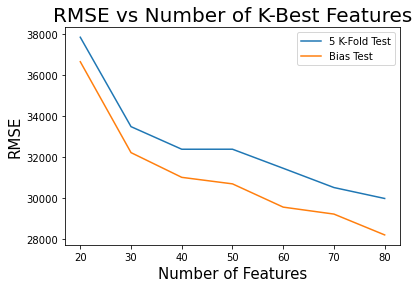

In [45]:
# Plot RMSE for models created with different number of features
plt.plot(k_features, rmse_regular_test, label = '5 K-Fold Test')
plt.plot(k_features, rmse_bias_test, label = 'Bias Test')
plt.title('RMSE vs Number of K-Best Features', fontsize=20)
plt.xlabel('Number of Features', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.legend()
plt.show()





30 looks like the idea number of features before we start overfitting the model. This happens when the model starts performing significantly worse when it is tested on new data. 

## Features Correlated with Sale Price

Another method of selecting features is by identifying the features that are most highly correltated with sale price. Now that we have a modified dataset that contains only numeric values, we can see which features are most correlated with price.



In [46]:
# Calculate feature correlations with Sale Price
corr_price = transformed_houses.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')
print(f'\033[1mFeature correlation coefficients with "SalePrice"\033[0m\n{corr_price}')

# Correlation values are absolute values (-.3 would be 0.3). 
# We do this to make it easier to sort by relative importance.


Feature correlation coefficients with "SalePrice"
Overall Qual          0.804387
Gr Liv Area           0.719756
Exter Qual            0.699670
Bsmt Qual             0.679565
Kitchen Qual          0.673854
                        ...   
Lot Config_Corner     0.004923
House Style_2.5Unf    0.004555
Roof Style_Flat       0.003821
Condition 1_RRAn      0.003515
Foundation_Wood       0.000124
Name: SalePrice, Length: 164, dtype: float64


In [47]:
print(f'\033[1mThere are {len(corr_price[corr_price >= 0.3])} features with a sales price correlation of at least 0.3.\033[0m\n')

print(f'\033[1mThere are {len(corr_price[corr_price >= 0.4])} features with a sales price correlation of at least 0.4.\033[0m\n')

print(f'\033[1mThere are {len(corr_price[corr_price >= 0.5])} features with a sales price correlation of at least 0.5.\033[0m')

There are 30 features with a sales price correlation of at least 0.3.

There are 23 features with a sales price correlation of at least 0.4.

There are 16 features with a sales price correlation of at least 0.5.


In [48]:
# Identify featuers with at least a 0.4 correlation with sale price 
corr_04_features = list(corr_price[(corr_price >= 0.4)].index)
print(f'\033[1mHere are the features with a correlation of at least 0.4:\033[0m\n{corr_price[(corr_price >= 0.4)]}')

Here are the features with a correlation of at least 0.4:
Overall Qual            0.804387
Gr Liv Area             0.719756
Exter Qual              0.699670
Bsmt Qual               0.679565
Kitchen Qual            0.673854
Garage Cars             0.650141
Total Bsmt SF           0.647890
Garage Area             0.644888
1st Flr SF              0.638754
Years Before Sale       0.557981
Full Bath               0.546287
Years Since Remod       0.533118
Foundation_PConc        0.521985
Garage Finish_Unf       0.520331
Mas Vnr Area            0.513235
TotRms AbvGrd           0.500635
Fireplaces              0.478729
Heating QC              0.448641
Garage Yr Blt           0.441083
BsmtFin SF 1            0.440093
Neighborhood_NridgHt    0.431675
Garage Finish_Fin       0.425160
Bsmt Exposure           0.400120
Name: SalePrice, dtype: float64


In [49]:
# Create list of correlation cutoff points
corr_cutoff = [.15,.2,.3,.4,.5,.6]
n_features = []
rmse_regular_test = []
rmse_bias_test = []
# Cycle through correlation cutoff points and create models with features of different levels of correlation
for c in corr_cutoff:
    corr_feat_houses = transformed_houses.drop(corr_price[corr_price < c].index, axis=1)
    n_features.append(len(corr_price[corr_price >= c]))
    print(f'\033[1mNumber of remaining features:\033[0m {corr_feat_houses.shape[1]}')
    print(f'\033[1mWhen tested on different data that it was trained on, the model with features with at least a {c} correlation with house price resulted in RMSE of\033[0m')
    rmse_1 = k_fold_train_test(corr_feat_houses,k=5)
    rmse_regular_test.append(rmse_1)
    print(f'\033[1mWhen tested on the same data that it was trained on, the model with features with at least a {c} correlation with house price resulted in RMSE of\033[0m')
    rmse_2 = k_fold_bias_test(corr_feat_houses,5)
    rmse_bias_test.append(rmse_2)
    print('\n\n')

Number of remaining features: 62
When tested on different data that it was trained on, the model with features with at least a 0.15 correlation with house price resulted in RMSE of
RMSE values: [29518.64, 24331.32, 37936.12, 26207.35, 24585.77]
Average RMSE: 28515.84
When tested on the same data that it was trained on, the model with features with at least a 0.15 correlation with house price resulted in RMSE of
RMSE values: [28047.78, 27924.34, 24385.88, 27876.45, 27593.38]
RMSE: 27165.57



Number of remaining features: 51
When tested on different data that it was trained on, the model with features with at least a 0.2 correlation with house price resulted in RMSE of
RMSE values: [25263.31, 37412.95, 27815.65, 29238.07, 26685.39]
Average RMSE: 29283.07
When tested on the same data that it was trained on, the model with features with at least a 0.2 correlation with house price resulted in RMSE of
RMSE values: [28234.7, 25174.0, 28048.48, 28416.12, 28370.0]
RMSE: 27648.66



Number of r

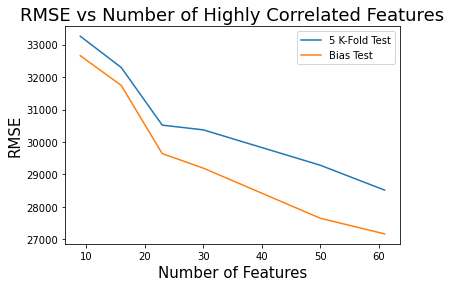

In [50]:
# Plot RMSE for models created with different number of features
plt.plot(n_features, rmse_regular_test, label = '5 K-Fold Test')
plt.plot(n_features, rmse_bias_test, label = 'Bias Test')
plt.title('RMSE vs Number of Highly Correlated Features', fontsize=18)
plt.xlabel('Number of Features', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.legend()
plt.show()

Again, it looks like somewhere between 20-30 features is ideal. We will now try to get some hybrid datasets that contain features, some of which come from Kbest-feautures and some of which come from being highly correlated with sale price. We will aim to have the hybrid dataset to have around 20-30 features. 

We will combine features from these groups in differnet ways. We will start with a union of features, which means we will adjust the correlation cutoff and number of KBest features until we have around 20 distinct features when the feature lists are combined.


In [51]:
# Dataset of ~25 from union of features highly correlated with sale price and from KBest function
corr_features = list(corr_price[corr_price > .5].index)

kbest_features = list(KBest_Features(transformed_houses,10))

# print(f'\033[1mThe {len(kbest_features)} best features according to K-Best are:\033[0m\n{kbest_features}\n')
# print(f'\033[1mThe {len(corr_features)} best features according to correlation with sale price are:\033[0m\n{corr_features}\n')
# both_lists = []
# for f in kbest_features:
#     if f in corr_features:
#         both_lists.append(f)
# print(f'\033[1mThe {len(both_lists)} features in both lists are:\033[0m\n{list(both_lists)}\n')
combined_lists = set(corr_features + kbest_features)
print(f'\033[1mThe {len(combined_lists)} combined best features are:\033[0m\n{list(combined_lists)}\n')

combined_lists = list(combined_lists)
combined_lists.append('SalePrice')
union_feature_houses = transformed_houses.copy()[combined_lists]



print(f'\033[1mWhen tested on different data that it was trained on, the model with this union of {len(combined_lists)} features resulted in RMSE of\033[0m')
rmse_1 = k_fold_train_test(union_feature_houses,k=5)
print(f'\n\033[1mWhen tested on the same data that it was trained on, the model with this union of {len(combined_lists)} features resulted in RMSE of\033[0m')

rmse_2 = k_fold_bias_test(union_feature_houses,5)


The 24 combined best features are:
['Overall Qual', 'Misc Val', 'Total Bsmt SF', 'Exter Qual', 'Pool Area', 'Mas Vnr Area', 'Kitchen Qual', 'Years Since Remod', 'BsmtFin SF 1', 'Full Bath', 'BsmtFin SF 2', '2nd Flr SF', 'Bsmt Qual', 'Garage Cars', 'Garage Finish_Unf', 'Gr Liv Area', 'Bsmt Unf SF', 'Years Before Sale', 'Garage Area', 'TotRms AbvGrd', 'Foundation_PConc', 'Low Qual Fin SF', '1st Flr SF', 'Lot Area']

When tested on different data that it was trained on, the model with this union of 25 features resulted in RMSE of
RMSE values: [40658.35, 28417.32, 32471.13, 27727.61, 28189.74]
Average RMSE: 31492.83

When tested on the same data that it was trained on, the model with this union of 25 features resulted in RMSE of
RMSE values: [31127.4, 27605.85, 31060.77, 30432.62, 30507.42]
RMSE: 30146.81


We will now identify a group of around 20 features that represents an intersection of highly correlated and KBest features. This means all of the features included in this group will be in both the KBest and highly correlated lists.

In [52]:
# Dataset of ~25 from intersection of features highly correlated with sale price and from KBest function

corr_features = list(corr_price[corr_price > .2].index)

kbest_features = list(KBest_Features(transformed_houses,40))

# print(f'\033[1mThe {len(kbest_features)} best features according to K-Best are:\033[0m\n{kbest_features}\n')
# print(f'\033[1mThe {len(corr_features)} best features according to correlation with sale price are:\033[0m\n{corr_features}\n')
both_lists = []
for f in kbest_features:
    if f in corr_features:
        both_lists.append(f)
print(f'\033[1mThe {len(both_lists)} features in both lists are:\033[0m\n{list(both_lists)}\n')
combined_lists = set(corr_features + kbest_features)
# print(f'\033[1mThe {len(combined_lists)} combined best features are:\033[0m\n{list(combined_lists)}\n')

both_lists.append('SalePrice')
intersection_feature_houses = transformed_houses.copy()[both_lists]



print(f'\033[1mWhen tested on different data that it was trained on, the model with this union of {len(both_lists)} features resulted in RMSE of\033[0m')
rmse_1 = k_fold_train_test(intersection_feature_houses,k=5)
print(f'\n\033[1mWhen tested on the same data that it was trained on, the model with this union of {len(both_lists)} features resulted in RMSE of\033[0m')

rmse_2 = k_fold_bias_test(intersection_feature_houses,5)



The 18 features in both lists are:
['Lot Area', 'Mas Vnr Area', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Years Before Sale', 'Years Since Remod', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Mas Vnr Type_Stone', 'Garage Type_BuiltIn']

When tested on different data that it was trained on, the model with this union of 19 features resulted in RMSE of
RMSE values: [43952.45, 31165.97, 31121.06, 31683.87, 31055.43]
Average RMSE: 33795.76

When tested on the same data that it was trained on, the model with this union of 19 features resulted in RMSE of
RMSE values: [33963.09, 33596.89, 31563.88, 34202.92, 33352.95]
RMSE: 33335.95


We see that the 24 feature dataset that merged the features from K-Best and from features most correlated with sale price results in a RMSE of 30667.63.

We see that the 19 feature dataset consisting of features that were included in K-Best and from correlated with sale price results in a RMSE of 33823.5.

Both of these datasets performed slightly worse than using the 24 features that had a correlation with sale price of at least 0.4 which resulted in an RMSE of 30429.91.

## Summary of initial results

It seems that our best performing model (according to lowest RMSE without adding too much bias) was genereated from the 20 features most correlated with sale price. We will use that as our base and see if we can improve it from there. Some of these numbers may be different than what appeared in the results above due to some of algorithms involving randomization.

| Dataset | Average 5 K-Fold RMSE |
| :- | -: |
| 24 features from union of K-Best and sale price correlation | 30667.63 |
| 19 features from intersection of K-Best and sale price correlation | 33823.5 |
| 24 features at least 0.4 sale price correlation | 30429.91 |
| 30 K-Best features | 33182.26 |



## Checking for Multicollinearity
[Multicollinearity](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058) happens when feature variables are highly correlated with other feature variables. If two feature vectors are highly correlated, then we may only need to include one of them in our model. Including both of them introduces unnecessarly complexity to our model and could cause our model to place more value on those features, resulting in less accurate price predictions. 

In the code below we will examine whether there some of our house features exhibit multicollinearity with other features and then remove some of the features to eliminate multicollinearily above a certain correlation cutoff.

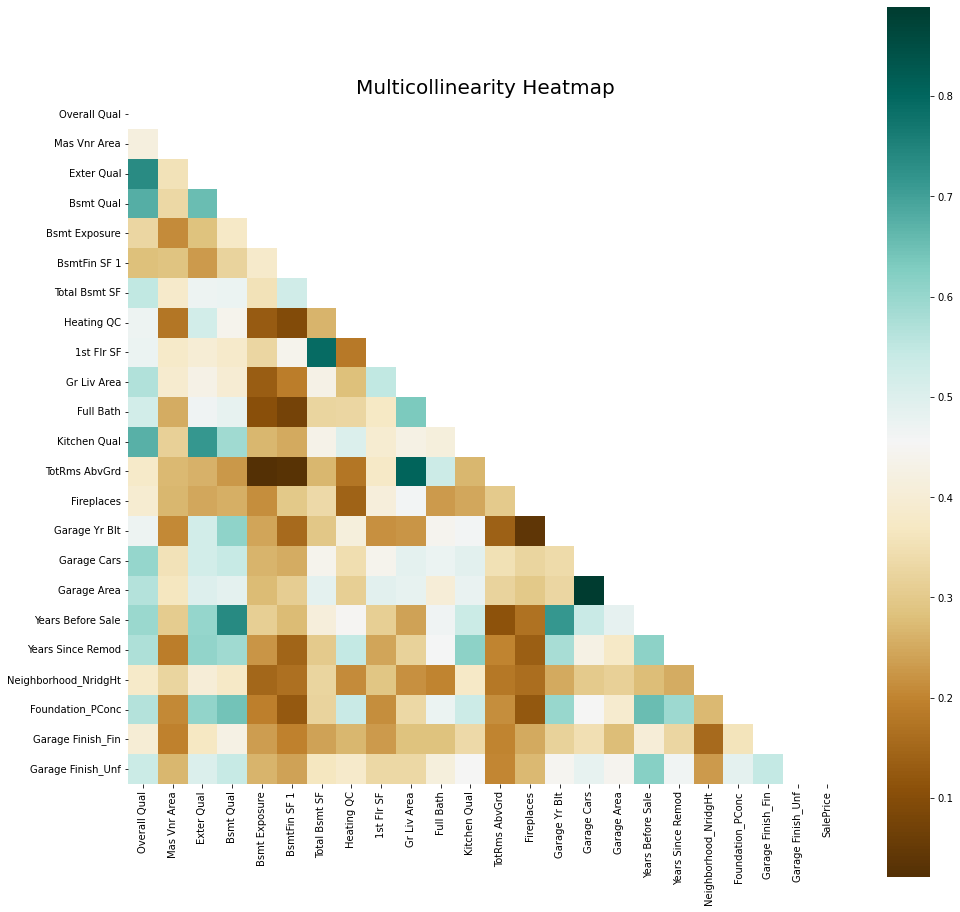

In [53]:
# Create mask to only show half of heatmap (avoids redundancy)
corr_40_feat_houses = transformed_houses.drop(corr_price[corr_price < .4].index, axis=1)
mask = np.triu(np.ones_like(corr_40_feat_houses.corr().drop('SalePrice'), dtype=bool))

# Create heatmap to show multicollinearity
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(abs(corr_40_feat_houses.corr().drop('SalePrice')), square=True, mask=mask, cmap='BrBG')
plt.title('Multicollinearity Heatmap', size=20)
plt.show()

In [54]:
# Create feature correlation matrix
corr_matrix = corr_40_feat_houses.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)

# Identify correlated feature pairs
all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .sort_values(ascending=False))

# Show pairs with feature correlations larget than 0.7
collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ['Feature_1', 'Feature_2', 'Coeff']
collinear_pairs


,Feature_1,Feature_2,Coeff
0,Garage Cars,Garage Area,0.888922
1,Gr Liv Area,TotRms AbvGrd,0.806267
2,Total Bsmt SF,1st Flr SF,0.791902
3,Bsmt Qual,Years Before Sale,0.738024
4,Overall Qual,Exter Qual,0.733822
5,Garage Yr Blt,Years Before Sale,0.715667
6,Exter Qual,Kitchen Qual,0.715189


In the above table, we see pairs of variable that are highly correlated with each other. We could go through each pair and remove whichever features of the pair has the least correlation with sale price. We could also attempt to use our domain knowledge of houses and eliminate features where there is another feature that captures roughly the same information. For instance, garage cars and garage area both seem to measure the size of the garage, so only one of them may be needed. Basement Quality and Years Before Sale, however, measure very different things.

We will remove Garage Area, Total Rooms Above Ground, and Exterior Quality because these features seem to have some qualitative overlap with their respective pairs.


In [55]:
# Create list of features with high multicollinearity to drop
features_to_drop = ['Garage Area','TotRms AbvGrd','Exter Qual']

# Drop features from above list
non_multi_corr_houses = corr_40_feat_houses.drop(features_to_drop,axis=1)


In [56]:
# Examine remaining features
non_multi_corr_houses.columns

Index(['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Years Before Sale',
       'Years Since Remod', 'Neighborhood_NridgHt', 'Foundation_PConc',
       'Garage Finish_Fin', 'Garage Finish_Unf', 'SalePrice'],
      dtype='object')

In [57]:
# Identify highly correlated feature pairs from remaining features

corr_matrix = non_multi_corr_houses.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)
all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .sort_values(ascending=False))


collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ['Feature_1', 'Feature_2', 'Coeff']
collinear_pairs

,Feature_1,Feature_2,Coeff
0,Total Bsmt SF,1st Flr SF,0.791902
1,Bsmt Qual,Years Before Sale,0.738024
2,Garage Yr Blt,Years Before Sale,0.715667


In [58]:
# Drop redundant basement and garage features
features_to_drop = ['Total Bsmt SF','Garage Yr Blt']
non_multi_corr_houses = non_multi_corr_houses.drop(features_to_drop,axis=1)

In [59]:
print(f'\033[1mHere are the model results using data set with collinear features removed:\033[0m\n')
print(f'\n\033[1mThe updated RMSE for a 5 K-Fold Cross Validation is:\033[0m\n')

# Run KFold test on updated dataset 
print(k_fold_train_test(non_multi_corr_houses,5))
print(f'\n\033[1mThe updated bias test is:\033[0m\n')

# Run KFold bias test on updated dataset 
print(k_fold_bias_test(non_multi_corr_houses,5))



Here are the model results using data set with collinear features removed:


The updated RMSE for a 5 K-Fold Cross Validation is:

RMSE values: [29226.59, 28879.4, 28326.29, 27845.3, 37896.63]
Average RMSE: 30434.84
30434.84

The updated bias test is:

RMSE values: [30108.08, 30267.97, 30771.06, 30741.95, 28478.21]
RMSE: 30073.45
30073.45


In [60]:
print(f'\033[1mThere are {non_multi_corr_houses.shape[1]} remaining features:\033[0m \n\n'
      f'{list(non_multi_corr_houses.columns)}')

There are 19 remaining features: 

['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1', 'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Fireplaces', 'Garage Cars', 'Years Before Sale', 'Years Since Remod', 'Neighborhood_NridgHt', 'Foundation_PConc', 'Garage Finish_Fin', 'Garage Finish_Unf', 'SalePrice']


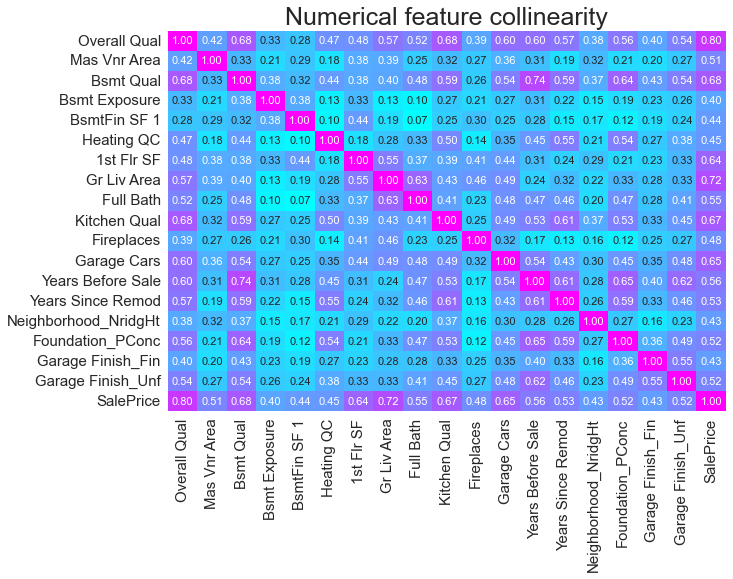

In [61]:
# Examine multicollinearity of remaining features
corr_feature_updated = non_multi_corr_houses.corr().abs()

sns.set_style('white')
plt.figure(figsize=(10, 7))
sns.heatmap(corr_feature_updated, cmap='cool',
            annot=True, annot_kws={'size': 11}, fmt='.2f', 
            cbar=False)
plt.title('Numerical feature collinearity', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We will now create models using the same Linear Regression functions we used before and compare our errors.

In [62]:
print(f'\033[1mHere are the model results using the dataset with collinear features removed:\033[0m\n')

print(f'\n\033[1mThe updated RMSE for a 5 K-Fold Cross Validation is:\033[0m\n')
print(k_fold_train_test(non_multi_corr_houses,5))

print(f'\n\033[1mThe updated bias test is:\033[0m\n')

k_fold_bias_test(non_multi_corr_houses,5)

Here are the model results using the dataset with collinear features removed:


The updated RMSE for a 5 K-Fold Cross Validation is:

RMSE values: [27122.95, 37670.57, 27623.99, 33129.09, 28362.96]
Average RMSE: 30781.91
30781.91

The updated bias test is:

RMSE values: [30129.34, 28691.67, 30743.18, 30671.66, 30255.6]
RMSE: 30098.29


30098.29

## Impact of multicollinearity minimization

Removing features that were highly with each other did not appear improve the model performance.

| Dataset | RMSE K-fold test | RMSE bias test|
| :- | -: | -: |
| 24 features at least 0.4 sale price correlation | 30429.91 | 29643.29 |
| 16 features with minimized multicollinearity | 31262.61 | 30622.08 |




## Removing Outliers

Another way that we can build a model that makes better predictions is by removing outliers from the data. When we build a model using linear regression, we are trying to determine how much each features of a house affects its price. The model needs to estimate how much a house's value would increase if its living area were 20% larger or if its kitchen were rated as excellent instead of good. In cases where there are only a few options, the data likely won't be that spread out. For kitchen quality for instance, there can only be ratings of 1-5. For open porch size, however, there is no real upper bound on the size, so it's possible that some houses may have porch sizes that are much larger than the average porch size. These extreme variations make it more difficult for the model to cleanly predict how much each feature impacts the price of the home. 

One way to help our model work around these outliers is by eliminating homes that have outlier feature values from the dataset. The benefit of this is that we will likely get lower RMSE, meaning that the model is better able to predict the price of homes (at least of those without outlier data). The concern here is that our model is now analyzing a dataset that is not as representative of the population of houses that exist. This means that if this model is used to predict homes in other datasets, it's possible that model will not perform well with homes that have outier data.  

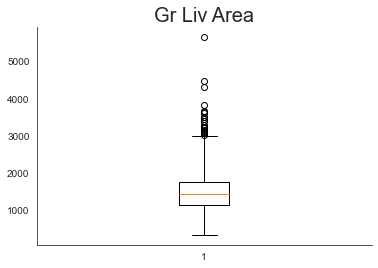

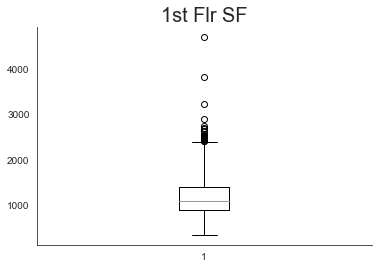

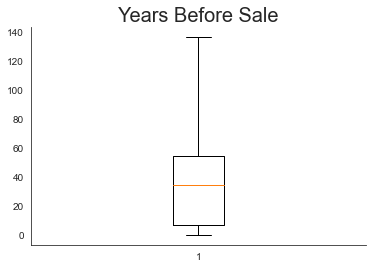

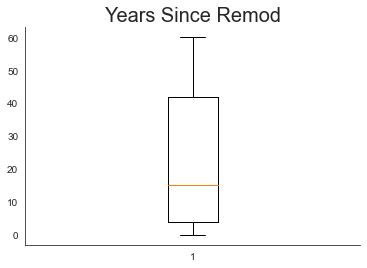

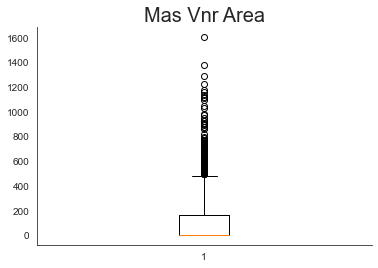

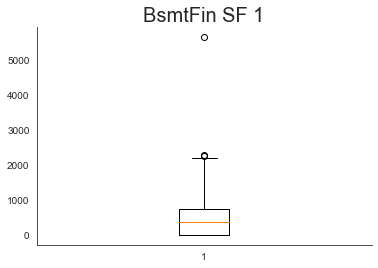

In [63]:
corr_price = corr_40_feat_houses.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')

# Create box plots for features 
for feature in corr_price.index:
    if feature in non_multi_corr_houses and non_multi_corr_houses[feature].nunique() > 10:
        plt.figure()
        plt.boxplot(non_multi_corr_houses[feature], whis=2)
        plt.title(f'{feature}', fontsize=20)
        sns.despine()

In [64]:
# Create copy that will only have houses with outlier feature values
outlier_houses = pd.DataFrame(columns = non_multi_corr_houses.columns)


print(f'\033[1mNumber of rows before removing the outliers:\033[0m {non_multi_corr_houses.shape[0]}')

# Create copy that will have houses with outlier features removed from it
outlier_free_houses = non_multi_corr_houses.copy()

# Iterate through features identified by box plots as having some outlier values
for feature in ['Gr Liv Area', 'Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF']:
    if feature in outlier_free_houses:
        
        # Identify first and third quantile for each feature
        Q1 = outlier_free_houses[feature].quantile(0.25)
        Q3 = outlier_free_houses[feature].quantile(0.75)
        
        # Calculate the interquartile range
        IQR = Q3 - Q1
        
        # Identify index of houses with features with values more than 2 IQR larger than the third quantile
        outlier_index = outlier_free_houses[outlier_free_houses[feature] > (Q3 + 2 * IQR)].index
        outlier_houses = pd.concat([outlier_houses, non_multi_corr_houses.loc[outlier_index]],axis=0)
        
        # Drop houses from dataset that have outlier features
        outlier_free_houses=outlier_free_houses.drop(outlier_index)

# Reset index of dataset 
outlier_free_houses = outlier_free_houses.reset_index(drop=True)

print(f'\033[1mNumber of rows after removing the outliers:\033[0m  {outlier_free_houses.shape[0]}')

Number of rows before removing the outliers: 2881
Number of rows after removing the outliers:  2738


In [65]:
# This dataset will allow us to use the first half to build a model using outlier-free data
# The second half will contain outliers at the same proportion as they exist in the original dataset
# We do this to avoid testing the dataset on a set of houses that has twice the normal proportion of outliers

half_outliers = outlier_houses.copy()
# Calculate half the number of outlier houses
n = round(len(outlier_houses)/2)

# Remove half of the outlier houses
half_outliers.drop(half_outliers.tail(n).index,inplace = True)

half_outliers_at_end = pd.DataFrame(columns = non_multi_corr_houses.columns)
# Add half of outlier houses to outier-free dataset

half_outliers_at_end = pd.concat([outlier_free_houses, half_outliers],axis=0)
half_outliers_at_end.head()

,Overall Qual,Mas Vnr Area,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Fireplaces,Garage Cars,Years Before Sale,Years Since Remod,Neighborhood_NridgHt,Foundation_PConc,Garage Finish_Fin,Garage Finish_Unf,SalePrice
0,6,112.0,3,4,639.0,2,1656,1656,1,3,2,2.0,50,50,0,0,1,0,215000
1,5,0.0,3,1,468.0,3,896,896,1,3,0,1.0,49,49,0,0,0,1,105000
2,6,108.0,3,1,923.0,3,1329,1329,1,4,0,1.0,52,52,0,0,0,1,172000
3,7,0.0,3,1,1065.0,5,2110,2110,2,5,2,2.0,42,42,0,0,1,0,244000
4,5,0.0,4,1,791.0,4,928,1629,2,3,1,2.0,13,12,0,1,1,0,189900


In [66]:
print(f'\033[1mHere are the model results using data set with outliers removed:\033[0m\n')


print(f'\033[1mThe updated RMSE for a 50/50 train/test split is:\033[0m\n')

# Run Linear Regression Test on Outlier Free House dataset
print(train_and_test(outlier_free_houses))
print(f'\n\033[1mThe updated RMSE for a 5 K-Fold Cross Validation is:\033[0m\n')


# Run KFold Test on Outlier Free House dataset
print(k_fold_train_test(outlier_free_houses,5))

print(f'\n\033[1mThe updated bias test is:\033[0m\n')

# Run KFold Bias Test on Outlier Free House dataset
k_fold_bias_test(outlier_free_houses,5)

Here are the model results using data set with outliers removed:

The updated RMSE for a 50/50 train/test split is:

26205.11

The updated RMSE for a 5 K-Fold Cross Validation is:

RMSE values: [23030.69, 25218.82, 25588.12, 25143.06, 27139.17]
Average RMSE: 25223.97
25223.97

The updated bias test is:

RMSE values: [25155.11, 24973.92, 24800.36, 24865.67, 24787.7]
RMSE: 24916.55


24916.55

In [67]:
# Build function that trains on first half of dataset and tests on second half

def test_outliers(df):
    lr = LinearRegression()
    split = round(len(df)/2)
    train = df[:split]
    test = df[split:]
    features = df.columns.drop('SalePrice')
    
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], predictions))
    return print(f'RMSE: {rmse:.2f}')

print(f'\033[1mHere are the model results being trained on houses without oultiers and being tested on houses with outliers:\033[0m\n')

test_outliers(half_outliers_at_end)


Here are the model results being trained on houses without oultiers and being tested on houses with outliers:

RMSE: 34870.67


We see that when the model is trained and tested on the dataset with outliers removed, the model performs well, but when we train the model on outlier-free dataset and test it on a model with outliers, then the model has over 50% higher RMSE. This leads us to believe that training the model without outliers results in a model that does not handle outliers well. 

We should remember that our goal is not to build a model that results in a low RMSE through any means necessary. Our goal is to build a model that can accurately predict house prices. We could take this outlier elimination plan to the extreme and only keep houses with features that are close to their respective means, but that essentailly be building a house price prediction model for a "cookie cutter" blend of houses, which is not the reality of our original dataset.

In [68]:
# Make list of features that were numerical in original dataset
original_num_features = list(original_num_features)

# Make variables for each feature type
n_ordinal = 0
n_numerical = 0
n_categorical = 0

# Iterate through each features used in highest performing model
# Count how many ordinal, numerical, and categorical features were in highest performing model
for f in corr_04_features:
    if f in ordinal_features:
        n_ordinal += 1    
    elif f in original_num_features:
        n_numerical += 1
    else:
        n_categorical += 1


print(f'\033[1mOf the {len(corr_04_features)} features with at least a 0.4 correlation with sale price:\033[0m\n{n_numerical} came from features that were numerical in the original dataset \n{n_ordinal} came from ordinal features\n{n_categorical} came from categorical features\n')
print(f'\033[1mThe features most correlated with sale price: \033[0m\n{corr_04_features}\n')

# Make list of final features used
final_features = list(non_multi_corr_houses.columns)
final_features.remove('SalePrice')

print(f'\033[1mThe features we used in our best model: \033[0m\n{final_features}\n')
print(f'\033[1mThe RMSE we got with our best model was 30429.91.\033[0m')

Of the 23 features with at least a 0.4 correlation with sale price:
14 came from features that were numerical in the original dataset 
5 came from ordinal features
4 came from categorical features

The features most correlated with sale price: 
['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Garage Cars', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Years Before Sale', 'Full Bath', 'Years Since Remod', 'Foundation_PConc', 'Garage Finish_Unf', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'Heating QC', 'Garage Yr Blt', 'BsmtFin SF 1', 'Neighborhood_NridgHt', 'Garage Finish_Fin', 'Bsmt Exposure']

The features we used in our best model: 
['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1', 'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Fireplaces', 'Garage Cars', 'Years Before Sale', 'Years Since Remod', 'Neighborhood_NridgHt', 'Foundation_PConc', 'Garage Finish_Fin', 'Garage Finish_Unf']

The RMSE we got 

# Conclusion

The house price prediction model exhibits better performance with increased features, but beyond 20-30 features, noticeable overfitting occurs. Optimal performance is observed with features highly correlated to sale price, where the 19 most correlated features were non-dummy variables.

Subjective decisions significantly influenced the model, particularly regarding acceptable levels of overfitting. While the addition of features generally reduced RMSE, this reflects a tradeoff inherent in predictive modeling.

The decision not to remove outlier data was supported by the observation that outlier-free datasets did not enhance model quality when tested against datasets containing outliers.

Incorporating neighborhood data rendered the model specific to Ames, Iowa. To create a more broadly applicable model, location features would need to be omitted.